In [2]:
import itertools
import numpy as np
import pandas as pd
from utils import plot_proj
from vectorizers import bertimbau
from sklearn.decomposition import PCA

C:\Users\orran\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# DATA

In [3]:
data = pd.read_csv('C:\\Users\\orran\\OneDrive\\Documentos\\GitHub\\Research-Prescriptions\\3k\\Experimento\\data\\teste\\data.csv')
data

,DATA,TEXTO,LABEL
0,2019-10-31,"atestado medico atesto, para os devidos fins, ...",1
1,2021-06-16,encaminho ao nutricionista paciente com sobrep...,1
2,2017-03-22,solicito: avaliacao corporal via bioimpedancia...,2
3,2013-07-02,"a psicologa, encaminho paciente com crises de ...",1
4,2019-06-12,paciente com queixas de dores em ombro direito...,1
...,...,...,...
2995,2015-01-12,solicitacao de exame: no. 835 convenio: matric...,2
2996,2013-06-04,uso oral 1.pantocal 40 mg tomar um comp via or...,0
2997,2018-04-10,trauma na mao direita (futebol) edemaem 5o ded...,1
2998,2019-02-11,solicitacao de exame: no. 2843 convenio: matri...,2


# Plot das classes

In [4]:
X_data, _ = bertimbau(data.TEXTO)

No sentence-transformers model found with name C:\Users\orran/.cache\torch\sentence_transformers\neuralmind_bert-base-portuguese-cased. Creating a new one with MEAN pooling.
Some weights of the model checkpoint at C:\Users\orran/.cache\torch\sentence_transformers\neuralmind_bert-base-portuguese-cased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initial

In [5]:
X_embedded = PCA(n_components=2).fit_transform(X_data)
label_data = pd.DataFrame(data = X_embedded, columns = ['principal component 1', 'principal component 2'])
label_data.tail()

,principal component 1,principal component 2
2995,-0.993414,2.464733
2996,2.603865,-0.349411
2997,-0.947079,-0.155999
2998,-2.692487,0.592301
2999,0.038975,3.153832


In [6]:
import numpy as np
import seaborn as sns
from itertools import cycle
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

def plot_proj(embedding, lbs, combination):
    n = len(embedding)
    counter = Counter(lbs)
    nome = ''
    cor = ''
    for i in range(len(np.unique(lbs))):
        if i == 0:
            nome = 'Receitas'
        elif i == 1:
            nome = 'Notas clínicas'
        else:
            nome = 'Solic. de exames'  #, label='{}: {:.2f}%'.format(nome, counter[i] / n * 100)
        plt.plot(embedding[:, 0][lbs == i], embedding[:, 1][lbs == i], '.', label='{}: {:.2f}%'.format(nome, counter[i] / n * 100))
    plt.legend(loc = 'best', fontsize=8)
    plt.xlabel('Primeiro componente', fontsize=11)
    plt.ylabel('Segundo componente', fontsize=11)
    plt.grid(color ='grey', linestyle='-',linewidth = 0.25)
    filename = 'C:\\Users\\orran\\OneDrive\\Documentos\\GitHub\\Research-Prescriptions\\3k\\Experimento\\Ensemble-Classification\\figures\\pca_%s.png' %combination
    plt.savefig(filename, dpi=800)

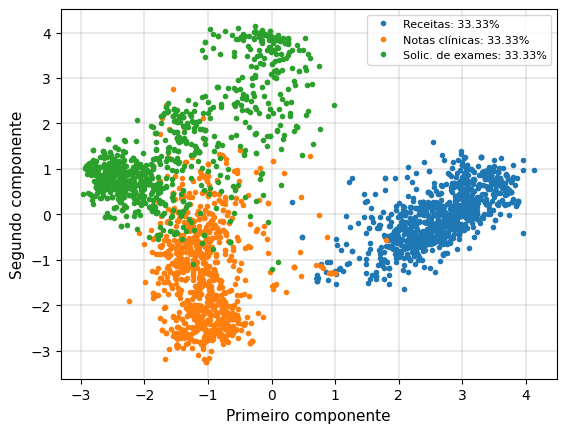

In [7]:
plot_proj(X_embedded, data.LABEL,'data_bert')

# Estatísticas

In [4]:
def get_median_num_words_per_sample(sample_texts):
    num_words = [len(s.split()) for s in sample_texts]
    return np.median(num_words)

In [5]:
def get_num_words_per_sample(sample_texts):
    num_words = [len(s.split()) for s in sample_texts]
    return np.sum(num_words)

In [6]:
def get_num_unique_words_per_sample(sample_texts):
    words = [s.split() for s in sample_texts]
    words = list(itertools.chain(*words))
    unique = set(words) 
    return len(unique)

In [8]:
print('Número de amostras no total -', len(data))
print('------------------------------------------')

print('Número de amostras na classe 0 -', len(data.loc[data.LABEL == 0]))
print('Número de amostras na classe 1 -', len(data.loc[data.LABEL == 1]))
print('Número de amostras na classe 2 -', len(data.loc[data.LABEL == 2]))

print('------------------------------------------')
print('Número de palavras nas amostras na classe 0 -', get_num_words_per_sample(data.TEXTO.loc[data.LABEL == 0]))
print('Número de palavras nas amostras na classe 1 -', get_num_words_per_sample(data.TEXTO.loc[data.LABEL == 1]))
print('Número de palavras nas amostras na classe 2 -', get_num_words_per_sample(data.TEXTO.loc[data.LABEL == 2]))

print('------------------------------------------')
print('Número de palavras únicas nas amostras na classe 0 -', get_num_unique_words_per_sample(data.TEXTO.loc[data.LABEL == 0]))
print('Número de palavras únicas nas amostras na classe 1 -', get_num_unique_words_per_sample(data.TEXTO.loc[data.LABEL == 1]))
print('Número de palavras únicas nas amostras na classe 2 -', get_num_unique_words_per_sample(data.TEXTO.loc[data.LABEL == 2]))

print('------------------------------------------')
print('Número médio de palavras por amostra na classe 0 -', get_median_num_words_per_sample(data.TEXTO.loc[data.LABEL == 0]))
print('Número médio de palavras por amostra na classe 1 -', get_median_num_words_per_sample(data.TEXTO.loc[data.LABEL == 1]))
print('Número médio de palavras por amostra na classe 2 -', get_median_num_words_per_sample(data.TEXTO.loc[data.LABEL == 2]))

Número de amostras no total - 3000
------------------------------------------
Número de amostras na classe 0 - 1000
Número de amostras na classe 1 - 1000
Número de amostras na classe 2 - 1000
------------------------------------------
Número de palavras nas amostras na classe 0 - 38054
Número de palavras nas amostras na classe 1 - 36205
Número de palavras nas amostras na classe 2 - 15811
------------------------------------------
Número de palavras únicas nas amostras na classe 0 - 1934
Número de palavras únicas nas amostras na classe 1 - 4361
Número de palavras únicas nas amostras na classe 2 - 1745
------------------------------------------
Número médio de palavras por amostra na classe 0 - 32.0
Número médio de palavras por amostra na classe 1 - 23.0
Número médio de palavras por amostra na classe 2 - 14.0
